# ADS500B Final Team Project
## Lindy Conrad, Jordan Torres, & Alli McKernan
### Dataset 2 (House Sales)

## 1) Data Importing & Pre-processing

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Import dataset
file_path = '/Users/allig/ads500b/house_sales.csv'  # file path
data = pd.read_csv(file_path)

# Describe dataset characteristics
print("Dataset Dimensions:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nFirst few rows of the dataset:\n", data.head())
print("\nDataset Description:\n", data.describe())

# Clean and wrangle data
# Fill missing values with the median for continuous variables
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())
data['sqft_living'] = data['sqft_living'].fillna(data['sqft_living'].median())
data['sqft_lot'] = data['sqft_lot'].fillna(data['sqft_lot'].median())

# Transform data
# Convert `date` to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

# Normalize continuous variables and create new columns for normalized values
scaler = MinMaxScaler()
data[['norm_price', 'norm_sqft_living', 'norm_sqft_lot', 'norm_sqft_above', 'norm_sqft_basement', 
      'norm_lat', 'norm_long', 'norm_sqft_living15', 'norm_sqft_lot15']] = scaler.fit_transform(
    data[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 
          'sqft_living15', 'sqft_lot15']]
)

# Feature construction based on existing ones- 'age' & 'years_since_renovation'
data['age'] = 2024 - data['yr_built']
data['years_since_renovation'] = data['yr_renovated'].apply(lambda x: 2024 - x if x > 0 else 0)

# Reduce redundant data
# Drop redundant columns
data = data.drop(columns=['id', 'yr_built', 'yr_renovated'])

# Discretization: Create bins for sqft_living
data['sqft_living_bins'] = pd.cut(data['sqft_living'], bins=5, labels=False)

# Display cleaned and transformed data
print("\nCleaned and Transformed Data (first few rows):\n", data.head())

# Save the cleaned and transformed data to a new CSV file
output_file_path = '/Users/allig/ads500b/cleaned_house_sales.csv'
data.to_csv(output_file_path, index=False)
print(f"Cleaned and transformed dataset has been saved to {output_file_path}")

# Verifying no missing values in new dataset
df = pd.read_csv('/Users/allig/ads500b/cleaned_house_sales.csv')
total_missing_values = df.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing_values)

Dataset Dimensions: (21613, 21)

Data Types:
 id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

First few rows of the dataset:
            id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       19

# 2) Data Analysis & Visualization

In [2]:
# Import Necessary Packages
import numpy as np
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Load data into pandas object
house_sales_df = pd.read_csv('/Users/allig/ads500b/cleaned_house_sales.csv',header=0, sep=',')
house_sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,norm_sqft_lot,norm_sqft_above,norm_sqft_basement,norm_lat,norm_long,norm_sqft_living15,norm_sqft_lot15,age,years_since_renovation,sqft_living_bins
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,...,0.003108,0.097588,0.000000,0.571498,0.217608,0.161934,0.005742,69,0,0
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,...,0.004072,0.206140,0.082988,0.908959,0.166113,0.222165,0.008027,73,33,0
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,...,0.005743,0.052632,0.000000,0.936143,0.237542,0.399415,0.008513,91,0,0
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,...,0.002714,0.083333,0.188797,0.586939,0.104651,0.165376,0.004996,59,0,0
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,...,0.004579,0.152412,0.000000,0.741354,0.393688,0.241094,0.007871,37,0,0


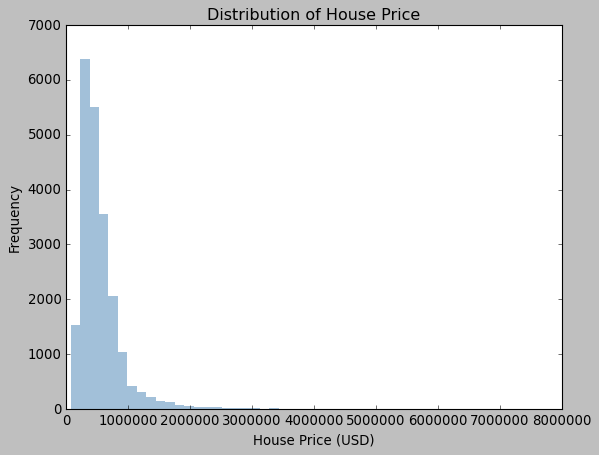

In [4]:
# Creating a histogram of House Price
plt.hist(house_sales_df['price'], bins=50, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
plt.xlabel('House Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of House Price');

<Axes: xlabel='floors', ylabel='price'>

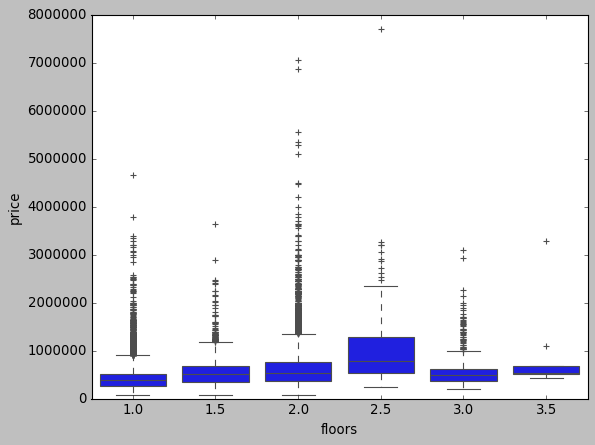

In [5]:
#Box plot of house price by number of floors
sns.boxplot(x="floors", y="price", data=house_sales_df)

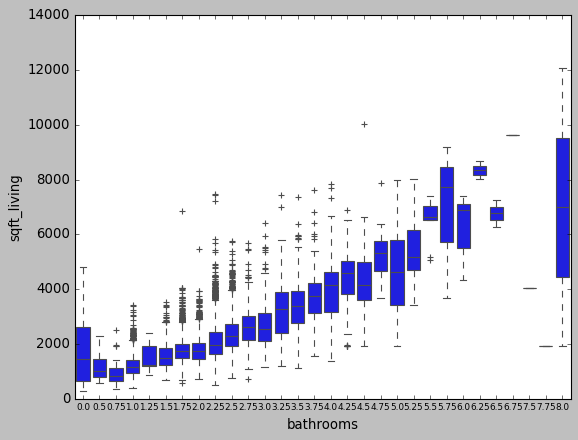

In [6]:
#Box plot of square feet of living space by bathrooms
sns.boxplot(x="bathrooms", y="sqft_living", data=house_sales_df)
plt.xticks(fontsize=8)
plt.show()

Text(0.5, 1.0, 'Average vs Size of Living Space')

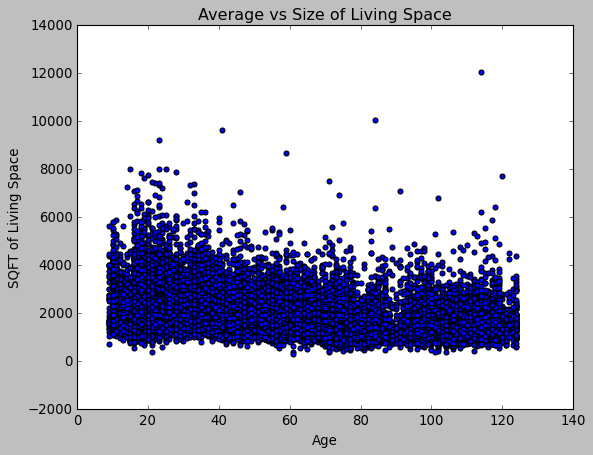

In [7]:
plt.scatter(house_sales_df.loc[:,['age']], house_sales_df.loc[:,['sqft_living']], marker='o')
plt.xlabel('Age')
plt.ylabel('SQFT of Living Space')
plt.title('Average vs Size of Living Space')

In [8]:
# Correlation Matrix for Quantitative Data
house_sales_quant = house_sales_df.select_dtypes((int, float))
correlations = house_sales_quant.corr()
print(correlations)

                           price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price                   1.000000  0.302493   0.515365     0.681527  0.086530   
bedrooms                0.302493  1.000000   0.487280     0.549054  0.027174   
bathrooms               0.515365  0.487280   1.000000     0.714307  0.083146   
sqft_living             0.681527  0.549054   0.714307     1.000000  0.159695   
sqft_lot                0.086530  0.027174   0.083146     0.159695  1.000000   
floors                  0.256794  0.172168   0.487859     0.345290 -0.005718   
waterfront              0.266369 -0.005045   0.067113     0.105203  0.020783   
view                    0.397293  0.079782   0.181425     0.276528  0.073535   
condition               0.036362  0.028137  -0.123002    -0.057751 -0.008757   
grade                   0.667434  0.348556   0.648745     0.744259  0.109016   
sqft_above              0.605567  0.465769   0.667757     0.850785  0.176831   
sqft_basement           0.323816  0.2916

# 3) Data Analytics

Before performing data analytics, it's important to understand the variables in our dataset. This dataset focuses on housing sales, with the price being a key variable. By emphasizing sales, we can use price as our dependent variable and other features of the houses (such as size, location, and bathrooms) as independent variables to develop a model.

<br>

For the type of learning method, we are going to use supervised learning. With supervised learning we can create a regression model to help predict prices for new, unseen data based on patterns from the previous data.

In [9]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the cleaned dataset
cleaned_df = pd.read_csv('cleaned_house_sales.csv')

# Display the first few rows of the dataset
print(cleaned_df.head())

         date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-10-13  221900.0       3.0       1.00       1180.0    5650.0     1.0   
1  2014-12-09  538000.0       3.0       2.25       2570.0    7242.0     2.0   
2  2015-02-25  180000.0       2.0       1.00        770.0   10000.0     1.0   
3  2014-12-09  604000.0       4.0       3.00       1960.0    5000.0     1.0   
4  2015-02-18  510000.0       3.0       2.00       1680.0    8080.0     1.0   

   waterfront  view  condition  ...  norm_sqft_lot  norm_sqft_above  \
0           0     0          3  ...       0.003108         0.097588   
1           0     0          3  ...       0.004072         0.206140   
2           0     0          3  ...       0.005743         0.052632   
3           0     0          5  ...       0.002714         0.083333   
4           0     0          3  ...       0.004579         0.152412   

   norm_sqft_basement  norm_lat  norm_long  norm_sqft_living15  \
0            0.000000  0.571498 

Comparing price and square footage of the living space 

In [10]:
# Using both Square footage and price as our variables
X = cleaned_df[['sqft_living']]
y = cleaned_df['price']

In [11]:
# Split the data into training and testing sets at 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 79970499334.00558
R-squared: 0.47101310684590214


Now we are going to use price and bathrooms

In [14]:
X = cleaned_df[['bathrooms']]
y = cleaned_df['price']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 111404210073.48256
R-squared: 0.26308616975211496


Square footage of living space provides a better predictor of housing prices than the number of bathrooms. This is shown in both the lower MSE and higher R squared values. While, both did show strong correlations in the analysis and visualization, it makes sense that square footage of living space would provide better value in the housing price. 